In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
def get_df(id):
    path = './' + 'RD_17_06/' + 'unity/' + 'Shovel' + '_' + id + '.csv'
    return pd.read_csv(path)

c_0 = get_df("C0")
c_1 = get_df("C1")
c_2 = get_df("C2")
p_0 = get_df("P0")
p_1 = get_df("P1")
p_2 = get_df("P2")

c_0.head(3)

,ts_datetime,ts_unix_ms,primary_grab_hand,pt_x,pt_y,pt_z,st_x,st_y,st_z,pv_x,...,hmd_x,hmd_y,hmd_z,ee_x,ee_y,ee_z,shovel_loaded_state,cube_max_target_reached,grab_count,collision_or_load_count
0,6/17/2025 12:47:46 PM,1750157266336,Right,0.013479,0.082617,0.009835,-0.026263,0.161040,0.275415,0.013534,...,0.045486,0.761207,0.109002,-0.000339,0.069995,0.740010,False,0,1,0
1,6/17/2025 12:47:46 PM,1750157266350,Right,0.013560,0.082527,0.009633,-0.025655,0.159465,0.275159,0.013639,...,0.045671,0.760424,0.108624,-0.109571,0.213849,0.729117,False,0,1,0
2,6/17/2025 12:47:46 PM,1750157266379,Right,0.013584,0.082218,0.009236,-0.025412,0.157989,0.274887,0.013584,...,0.045949,0.758992,0.107817,-0.109463,0.209042,0.729566,False,0,1,0


In [10]:
def scatter(df, title, ax):

    ptx = df["pt_x"]
    ptz = df["pt_z"]

    stx = df["st_x"]
    stz = df["st_z"]

    eex = df["ee_x"]
    eez = df["ee_z"]

    hmdx = df["hmd_x"]
    hmdz = df["hmd_z"]

    # Create a scatter plot

    alpha = 0.1

    ax.scatter(ptx, ptz, alpha=alpha)
    ax.scatter(stx, stz, alpha=alpha)
    ax.scatter(eex, eez, alpha=alpha)
    ax.scatter(hmdx, hmdz, alpha=alpha)

    ax.set_xlim([-1.75,0.25])
    ax.set_ylim([-0.25,1.75])

    ax.title.set_text(title)


    ax.set_xlabel('X [m]')
    ax.set_ylabel('Z [m]')

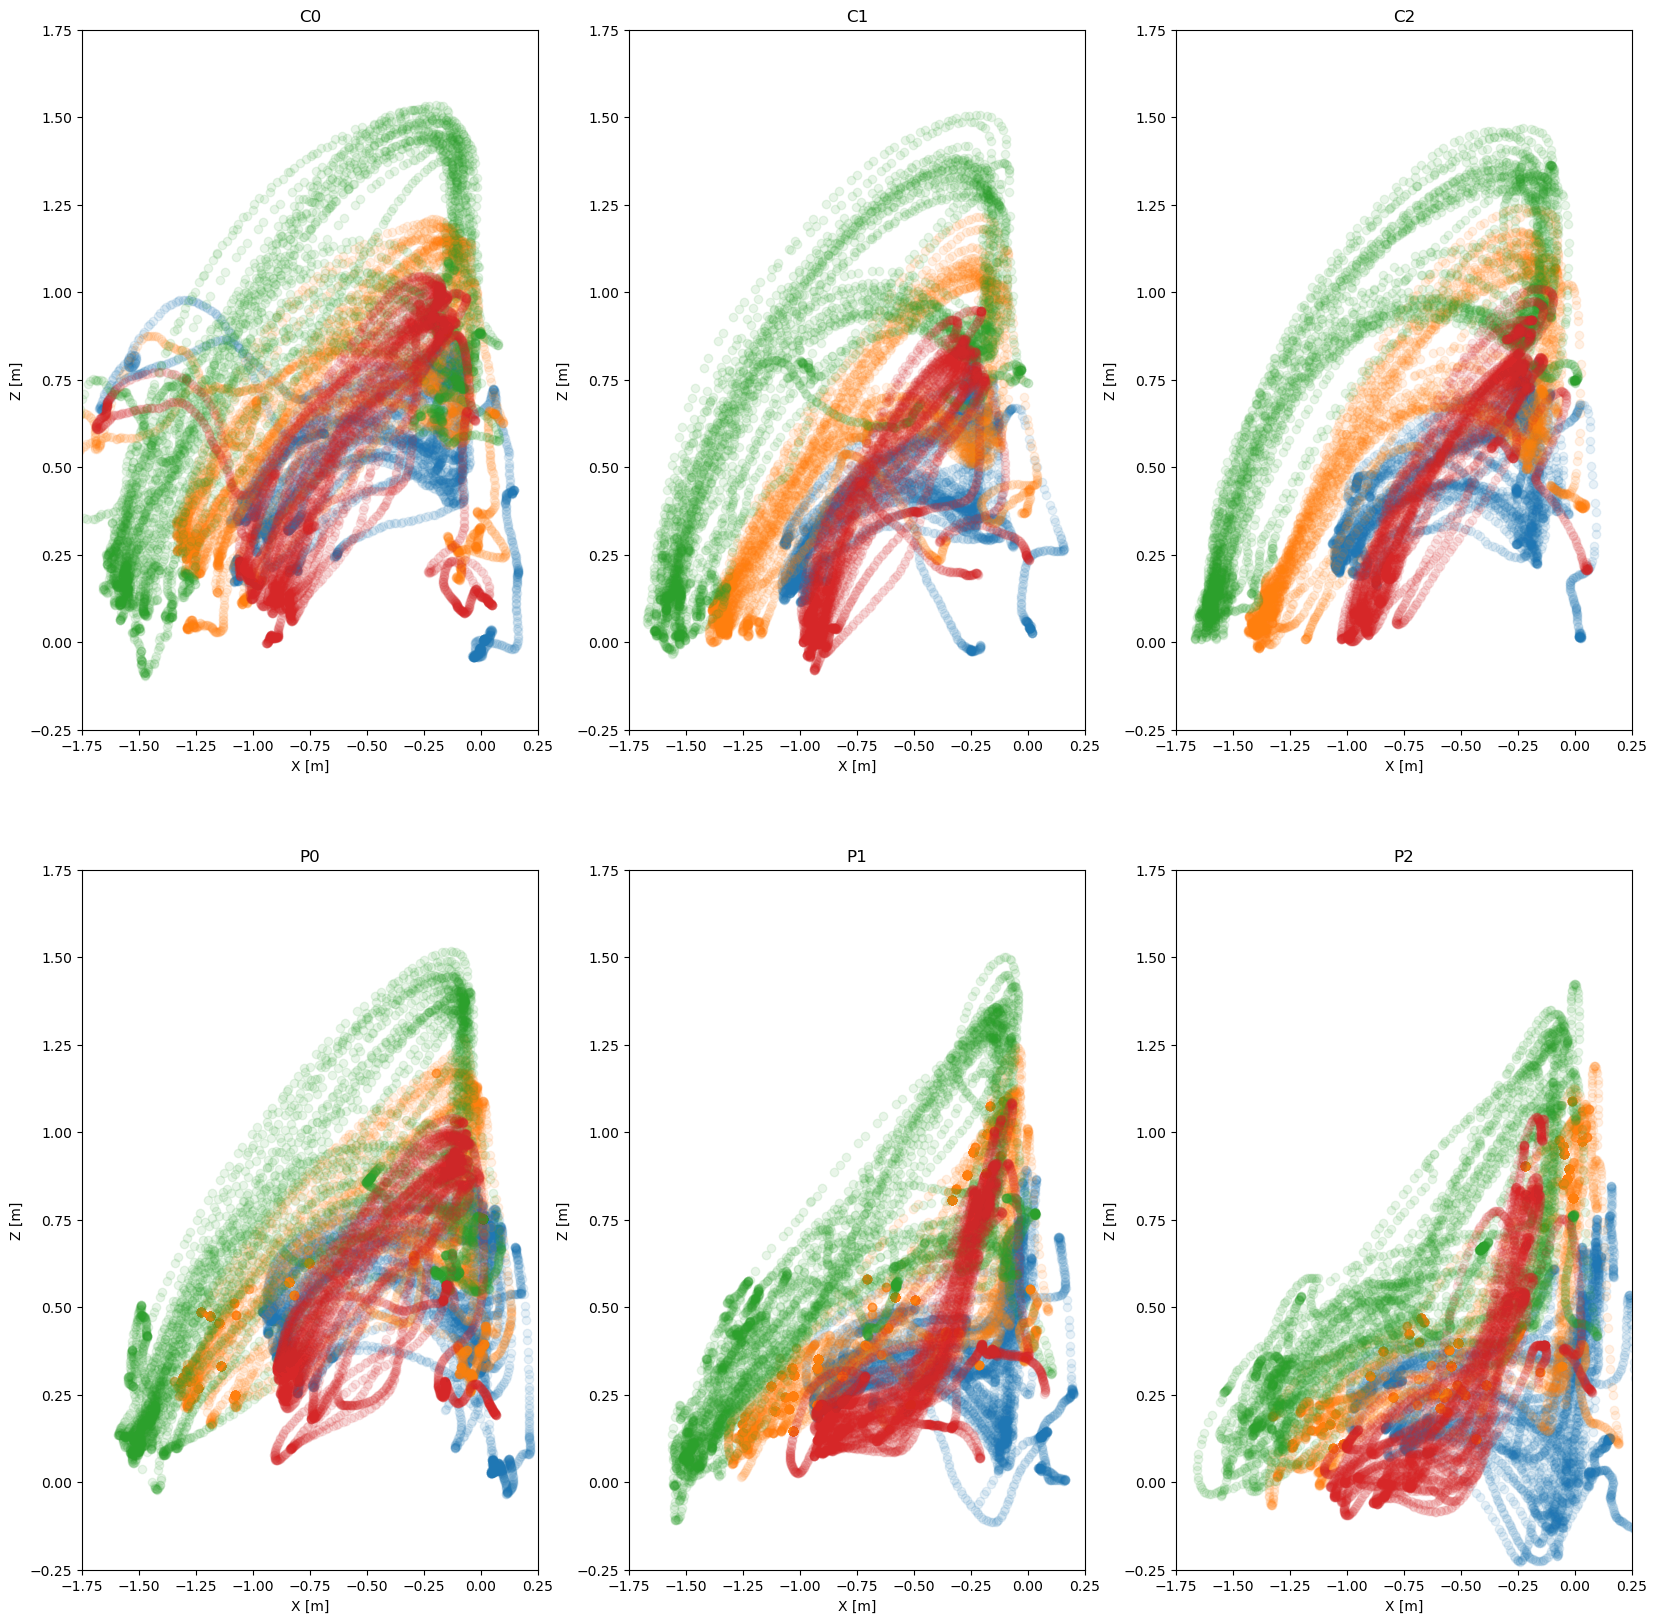

In [11]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

scatter(c_0, "C0", axs[0, 0])
scatter(c_1, "C1", axs[0, 1])
scatter(c_2, "C2", axs[0, 2])
scatter(p_0, "P0", axs[1, 0])
scatter(p_1, "P1", axs[1, 1])
scatter(p_2, "P2", axs[1, 2])

plt.show()

In [12]:
def heatmap(df, title, ax, tracking_pt):
    eex = df[tracking_pt+"_x"]
    eez = df[tracking_pt+"_z"]

    heatmap, xedges, yedges = np.histogram2d(eex, eez, bins=40, range=[[-1.75,0.25], [-0.25,1.75]])

    ax.title.set_text(title)
    # Plot the heatmap
    ax.imshow(heatmap.T, origin='lower', cmap='viridis', aspect='auto')
    

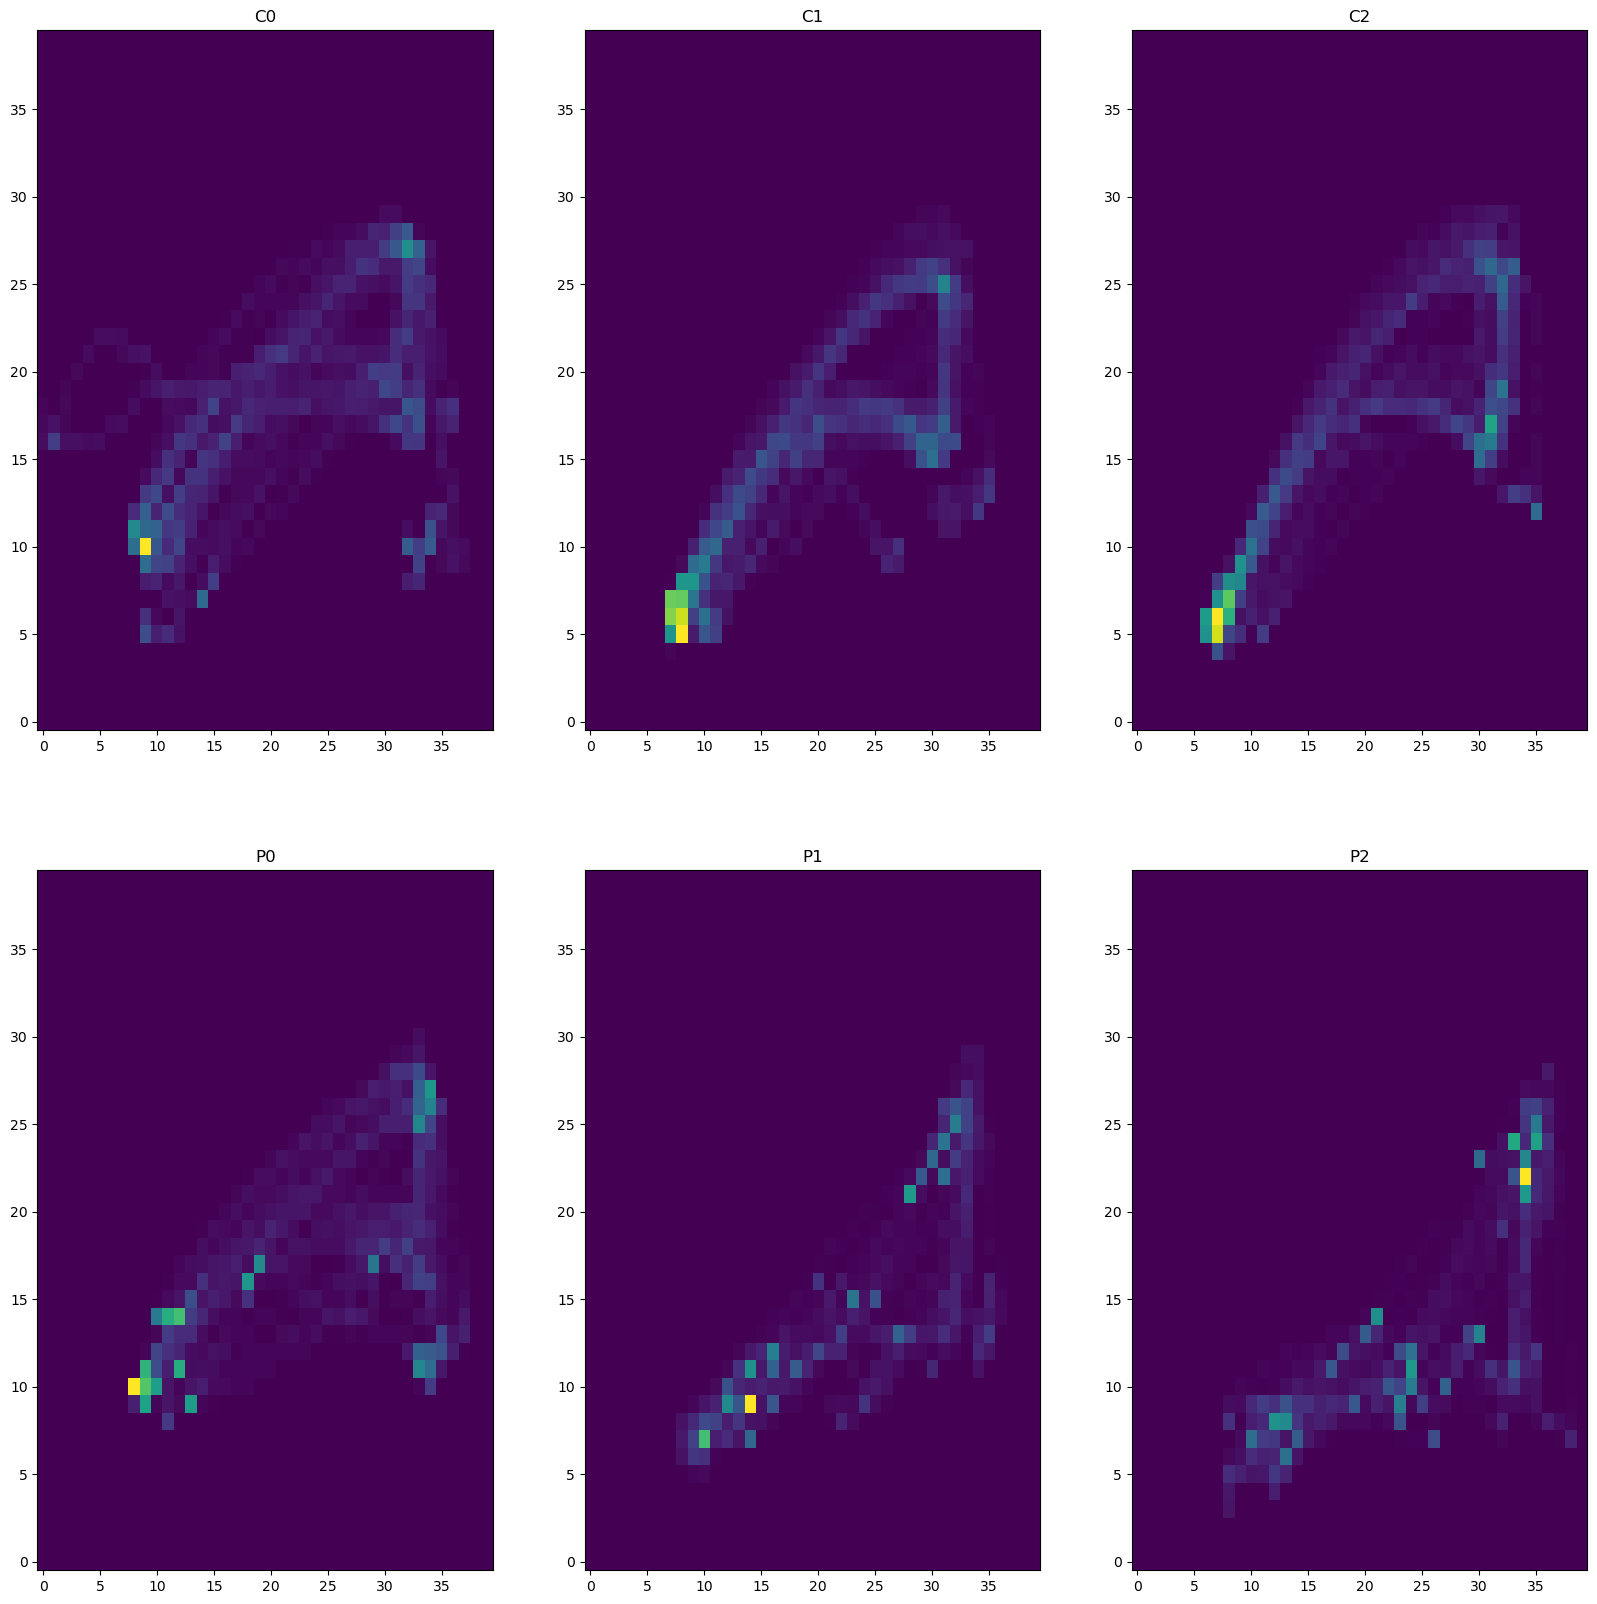

In [13]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

tracking_pt = "st"

heatmap(c_0, "C0", axs[0, 0], tracking_pt)
heatmap(c_1, "C1", axs[0, 1], tracking_pt)
heatmap(c_2, "C2", axs[0, 2], tracking_pt)
heatmap(p_0, "P0", axs[1, 0], tracking_pt)
heatmap(p_1, "P1", axs[1, 1], tracking_pt)
heatmap(p_2, "P2", axs[1, 2], tracking_pt)

plt.show()

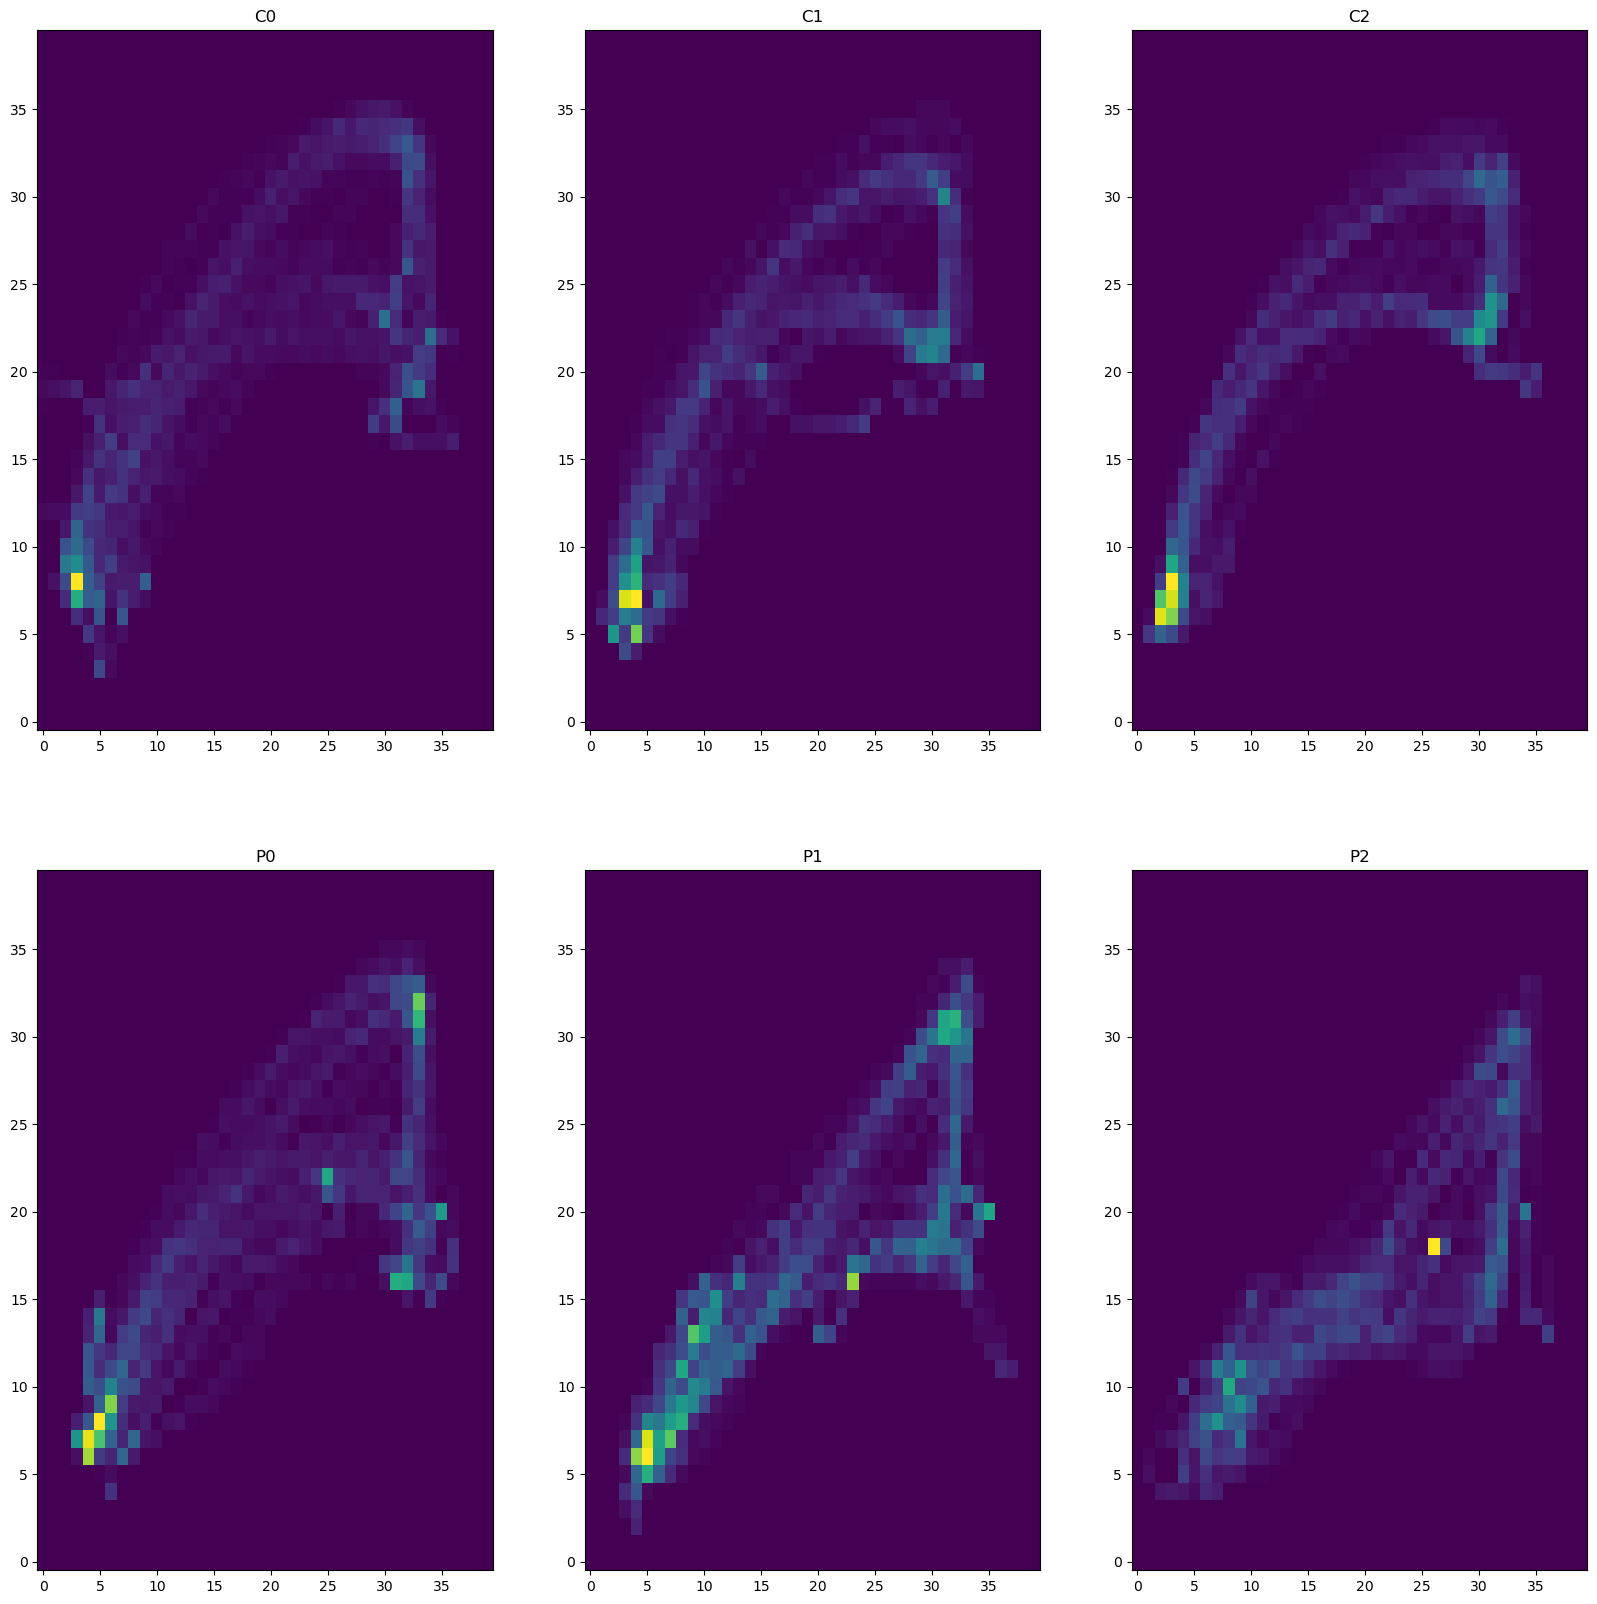

In [14]:
fig, axs = plt.subplots(2, 3)

fig.set_figwidth(20)
fig.set_figheight(20)

tracking_pt = "ee"

heatmap(c_0, "C0", axs[0, 0], tracking_pt)
heatmap(c_1, "C1", axs[0, 1], tracking_pt)
heatmap(c_2, "C2", axs[0, 2], tracking_pt)
heatmap(p_0, "P0", axs[1, 0], tracking_pt)
heatmap(p_1, "P1", axs[1, 1], tracking_pt)
heatmap(p_2, "P2", axs[1, 2], tracking_pt)

plt.show()